In [23]:
%load_ext autoreload
%autoreload 2
from spark import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
inp = open("/Users/jiayao/Work/spark/dat/30K/GWAS/plink.tdt", 'rt')
out = csv.writer(open("/Users/jiayao/Work/spark/dat/30K/GWAS/plink.tdt.tsv", 'wt'), delimiter="\t")
for l in inp:
    out.writerow(l.split())

In [26]:
df = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/plink.tdt.tsv", delimiter="\t")
df["SNP"] = df.apply(lambda x:str(x["CHR"])+":"+str(x["BP"]), axis=1)
df.to_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/plink.tdt.clean.tsv", index=False)
print(df.shape)
df.head(5)

(369116, 17)


,CHR,SNP,BP,A1,A2,T,U,OR,L95,U95,CHISQ,P,A:U_PAR,CHISQ_PAR,P_PAR,CHISQ_COM,P_COM
0,1,1:817341,817341,A,G,1954,1967,0.9934,0.9331,1.058,0.0431,0.8355,24:16,1.39100,0.23820,0.006302,0.9367
1,1,1:858952,858952,A,G,945,969,0.9752,0.8916,1.067,0.3009,0.5833,14:15,0.03226,0.85750,0.321300,0.5708
2,1,1:866156,866156,G,T,146,138,1.0580,0.8383,1.335,0.2254,0.6350,6:1,2.77800,0.09558,0.576800,0.4476
3,1,1:899712,899712,G,T,285,260,1.0960,0.9266,1.297,1.1470,0.2842,6:1,3.57100,0.05878,1.630000,0.2016
4,1,1:903175,903175,A,C,2242,2277,0.9846,0.9289,1.044,0.2711,0.6026,21:27,0.64290,0.42270,0.367400,0.5444


In [ ]:
QQplot2(list(df["P"].values), threshold=5e-8)

(array([41879., 38191., 37398., 36867., 35986., 36011., 35863., 35349.,
        35720., 35870.]),
 array([2.145e-17, 1.000e-01, 2.000e-01, 3.000e-01, 4.000e-01, 5.000e-01,
        6.000e-01, 7.000e-01, 8.000e-01, 9.000e-01, 1.000e+00]),
 <a list of 10 Patch objects>)

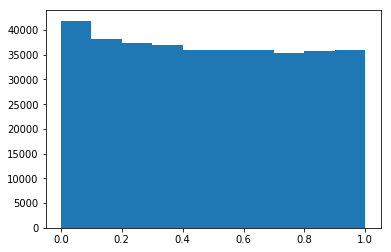

In [5]:
plt.hist(df["P"].values)

In [6]:
ipsych = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/iPSYCH-PGC_ASD_Nov2017.tsv", delimiter="\t")
print(ipsych.shape)
ipsych.head(3)

(9112386, 9)


,CHR,SNP,BP,A1,A2,INFO,OR,SE,P
0,8,rs62513865,101592213,T,C,0.949,1.00652,0.027,0.808600
1,8,rs79643588,106973048,A,G,0.997,1.01786,0.024,0.460600
2,8,rs17396518,108690829,T,G,0.987,0.96127,0.014,0.004647


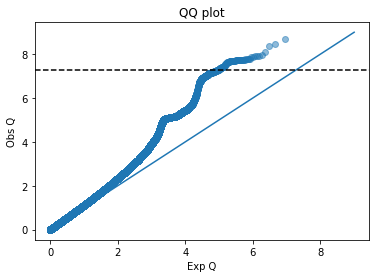

(array([1135473.,  963660.,  922276.,  897463.,  882345.,  874948.,
         868985.,  866193.,  853498.,  847545.]),
 array([2.04100000e-09, 1.00000002e-01, 2.00000002e-01, 3.00000001e-01,
        4.00000001e-01, 5.00000001e-01, 6.00000001e-01, 7.00000001e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

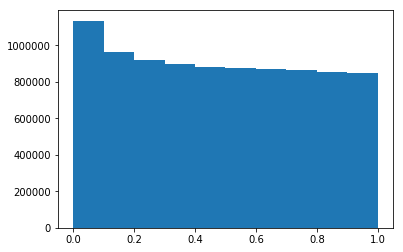

In [7]:
QQplot2(list(ipsych["P"].values),threshold=5e-8)
plt.hist(ipsych["P"].values)

In [8]:
ipsych = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/iPSYCH-PGC_ASD_Nov2017.hg38.bed", delimiter="\t")
ipsych.head(3)

,#CHR,START,END,SNP,A1,A2,INFO,OR,SE,P
0,8,100579985,100579985,rs62513865,T,C,0.949,1.00652,0.027,0.808600
1,8,105960820,105960820,rs79643588,A,G,0.997,1.01786,0.024,0.460600
2,8,107678601,107678601,rs17396518,T,G,0.987,0.96127,0.014,0.004647


In [9]:
ipsych = ipsych[["#CHR", "START", "SNP", "A1", "A2", "INFO", "OR", "SE", "P"]]
ipsych.columns = ["#CHR", "POS", "SNP", "A1", "A2", "INFO", "OR", "SE", "P"]
ipsych.head(3)

,#CHR,POS,SNP,A1,A2,INFO,OR,SE,P
0,8,100579985,rs62513865,T,C,0.949,1.00652,0.027,0.808600
1,8,105960820,rs79643588,A,G,0.997,1.01786,0.024,0.460600
2,8,107678601,rs17396518,T,G,0.987,0.96127,0.014,0.004647


In [10]:
ipsych["SNP"] = ipsych.apply(lambda x:str(x["#CHR"])+":"+str(x["POS"]), axis=1)
ipsych.head(3)
ipsych.to_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/iPSYCH-PGC_ASD_Nov2017.hg38.tsv", index=False)

In [27]:
spark = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/plink.tdt.clean.tsv", delimiter=",")
spark.head(3)
ipsych = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/iPSYCH-PGC_ASD_Nov2017.hg38.tsv", delimiter=",")
ipsych.head(3)

,Unnamed: 0,#CHR,POS,SNP,A1,A2,INFO,OR,SE,P
0,0,8,100579985,8:100579985,T,C,0.949,1.00652,0.027,0.808600
1,1,8,105960820,8:105960820,A,G,0.997,1.01786,0.024,0.460600
2,2,8,107678601,8:107678601,T,G,0.987,0.96127,0.014,0.004647


In [28]:
spark_snps = set(spark["SNP"].values)
ipsych_snps = set(ipsych["SNP"].values)

In [29]:
spark_not_ipsych = spark_snps.difference(ipsych_snps)
print(len(spark_not_ipsych))

42037


In [30]:
ipsych_not_spark = ipsych_snps.difference(spark_snps)
print(len(ipsych_not_spark))

8720654


In [31]:
both = ipsych_snps.intersection(spark_snps)
print(len(both))

327079


In [138]:
spark_sub = spark[spark["SNP"].isin(both)]
ipsych_sub = ipsych[ipsych["SNP"].isin(both)]
merged = pd.merge(spark_sub, ipsych_sub, on="SNP")
merged.head(3)

,Unnamed: 0_x,CHR,SNP,BP,A1_x,A2_x,T,U,OR_x,L95,...,P_COM,Unnamed: 0_y,#CHR,POS,A1_y,A2_y,INFO,OR_y,SE,P_y
0,0,1,1:817341,817341,A,G,1954,1967,0.9934,0.9331,...,0.9367,5193355,1,817341,A,G,0.915,1.00401,0.0189,0.8303
1,1,1,1:858952,858952,A,G,945,969,0.9752,0.8916,...,0.5708,5190080,1,858952,A,G,0.793,1.00310,0.0299,0.9187
2,13,1,1:953279,953279,T,C,673,679,0.9912,0.8909,...,0.8712,5176709,1,953279,T,C,0.904,0.98659,0.0305,0.6580


In [139]:
spark_sub.head(3)
spark_sub = spark_sub[['CHR','BP','A1','A2','T','U','OR','L95', 'U95', 'CHISQ','P']]
spark_sub.head(3)

,CHR,BP,A1,A2,T,U,OR,L95,U95,CHISQ,P
0,1,817341,A,G,1954,1967,0.9934,0.9331,1.058,0.04310,0.8355
1,1,858952,A,G,945,969,0.9752,0.8916,1.067,0.30090,0.5833
13,1,953279,T,C,673,679,0.9912,0.8909,1.103,0.02663,0.8704


In [140]:
def odds2zscore(OR, ORL95):
    logor = math.log(OR)
    logorl95 = math.log(ORL95)
    diff = logor - logorl95
    seor = diff / 1.96
    z = logor / seor
    return z
def P_z(Zscore):
    return (1 - scipy.stats.norm.cdf(abs(Zscore))) * 2

In [141]:
spark_sub["Zscore"] = spark_sub.apply(lambda row:odds2zscore(row["OR"], row["L95"]), axis=1)
spark_sub["N"] = spark_sub.apply(lambda row:(row["T"] + row["U"]), axis=1)
spark_sub.head(5)

,CHR,BP,A1,A2,T,U,OR,L95,U95,CHISQ,P,Zscore,N
0,1,817341,A,G,1954,1967,0.9934,0.9331,1.058,0.04310,0.8355,-0.207261,3921
1,1,858952,A,G,945,969,0.9752,0.8916,1.067,0.30090,0.5833,-0.549187,1914
13,1,953279,T,C,673,679,0.9912,0.8909,1.103,0.02663,0.8704,-0.162389,1352
14,1,953858,A,G,631,622,1.0140,0.9081,1.133,0.06464,0.7993,0.247042,1253
15,1,962184,T,C,809,827,0.9782,0.8879,1.078,0.19800,0.6563,-0.446034,1636


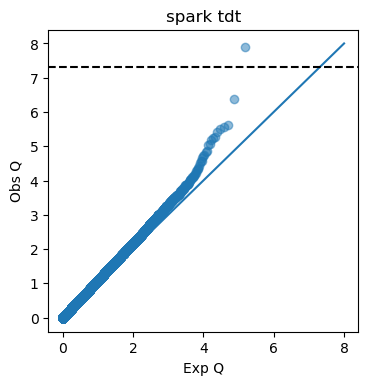

,CHR,BP,A1,A2,T,U,OR,L95,U95,CHISQ,P,Zscore,N
0,1,817341,A,G,1954,1967,0.9934,0.9331,1.058,0.0431,0.83550,-0.207261,3921
18,1,982260,A,G,2091,2050,1.0200,0.9597,1.084,0.4059,0.52400,0.636937,4141
19,1,983193,A,G,3022,2875,1.0510,0.9988,1.106,3.6640,0.05559,1.913803,5897


In [152]:
test = spark_sub[spark_sub["N"]>3000]
QQplot2(list(test["P"].values), threshold=5e-8, title="spark tdt")
test.head(3)

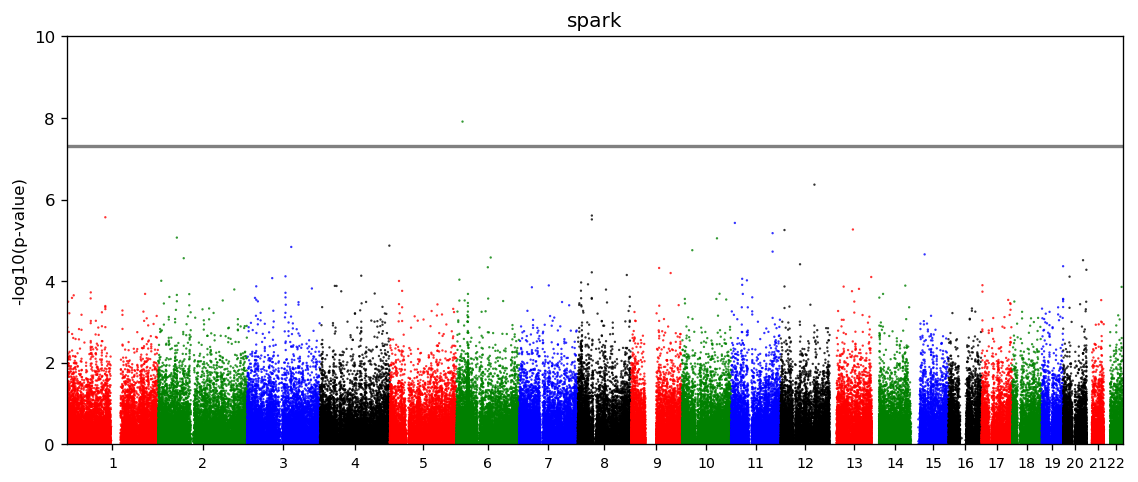

In [134]:
manhattan(test, title="spark")

In [99]:
ipsych_sub.head(3)
ipsych_sub = ipsych_sub[["#CHR", "POS", "A1", "A2", "INFO", "OR", "SE", "P"]]
ipsych_sub.head(3)

,#CHR,POS,A1,A2,INFO,OR,SE,P
9,8,102132364,A,C,0.997,1.04498,0.0167,0.008388
60,8,103657314,T,C,0.905,1.02296,0.0417,0.585800
78,8,101150009,A,G,0.803,0.94290,0.0489,0.229400


In [100]:
ipsych_sub.columns = ["CHR", "BP", "A1", "A2", "INFO", "OR", "SE", "P"]

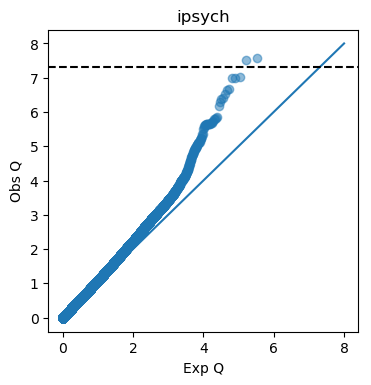

In [153]:
QQplot2(list(ipsych_sub["P"].values), threshold=5e-8, title="ipsych")

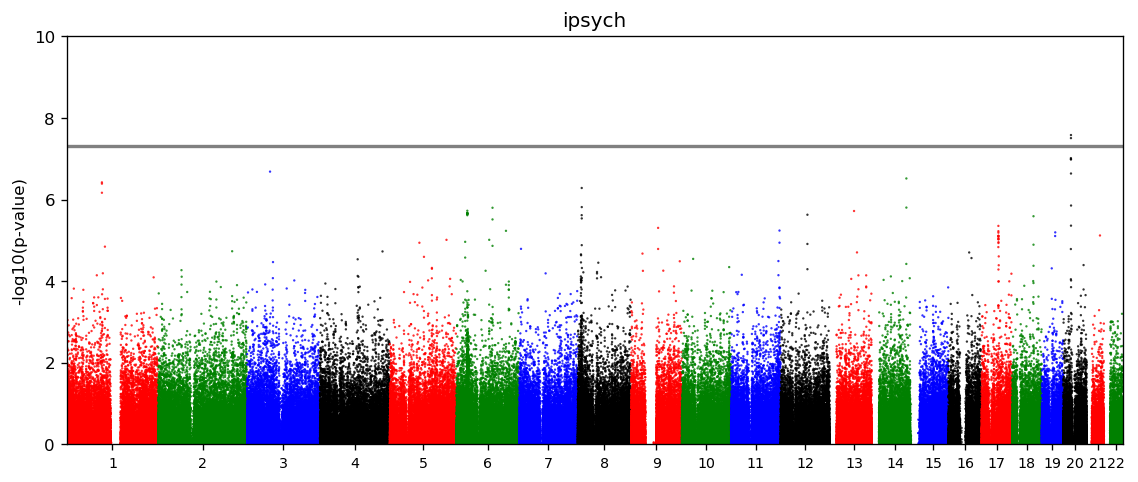

In [136]:
manhattan(ipsych_sub, title="ipsych")

In [103]:
def odds2zscore2(OR, SE):
    #logor = math.log(OR)
    #logorl95 = math.log(ORL95)
    #diff = logor - logorl95
    #seor = diff / 1.96
    #z = logor / seor
    logor = math.log(OR)
    z = logor / SE
    return z
def P_z(Zscore):
    return (1 - scipy.stats.norm.cdf(abs(Zscore))) * 2

In [105]:
ipsych_sub.head(3)
ipsych_sub["Zscore"] = ipsych_sub.apply(lambda row:odds2zscore2(row["OR"], row["SE"]), axis=1)
ipsych_sub["N"] = 18381 + 27969

In [109]:
ipsych_sub.head(5)
ipsych_sub.to_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/ipysch.common.tsv", sep="\t", index=False)

In [108]:
P = P_z(0.544374)
print(P)

0.5861841337413516


In [72]:
b = 1954
c = 1967
print((b-c)**2/(b+c))

0.043101249681203775


In [73]:
spark_sub.to_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark.common.tsv", sep="\t", index=False)

In [74]:
P = P_z(-0.549187)
print(P)

0.5828771249134803


In [75]:
#spark_sub.columns = ["CHR","POS", "A1", "A2", "T", "U", "Zscore", "CHISQ", "P-value"]
spark_sub.head(3)


ValueError: Length mismatch: Expected axis has 13 elements, new values have 9 elements

In [60]:
print(merged.columns.values)

['Unnamed: 0_x' 'CHR' 'SNP' 'BP' 'A1_x' 'A2_x' 'T' 'U' 'OR_x' 'CHISQ'
 'P_x' 'A:U_PAR' 'CHISQ_PAR' 'P_PAR' 'CHISQ_COM' 'P_COM' 'Unnamed: 0_y'
 '#CHR' 'POS' 'A1_y' 'A2_y' 'INFO' 'OR_y' 'SE' 'P_y']


In [61]:
merged_df = merged[['SNP', 'OR_x','CHISQ','P_x','OR_y','P_y']]
merged_df.head(5)

,SNP,OR_x,CHISQ,P_x,OR_y,P_y
0,1:817341,0.9934,0.04310,0.8355,1.00401,0.8303
1,1:858952,0.9752,0.30090,0.5833,1.00310,0.9187
2,1:953279,0.9912,0.02663,0.8704,0.98659,0.6580
3,1:953858,1.0140,0.06464,0.7993,0.98334,0.5834
4,1:962184,0.9782,0.19800,0.6563,0.98521,0.6235


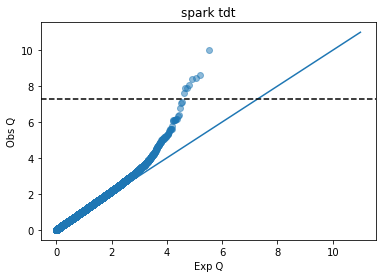

In [65]:
QQplot2(list(merged_df["P_x"].values), threshold=5e-8, title="spark tdt")

In [147]:
QQplot2(list(merged_df["P_y"].values), threshold=5e-8, title="ipsych")

NameError: name 'merged_df' is not defined

In [120]:
meta = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/METAANALYSIS1.TBL", delimiter="\t")
meta.head(3)

,snpid,Allele1,Allele2,Weight,Zscore,P-value,Direction
0,rs7926493,t,c,47928.0,0.560,0.5755,+-
1,rs114756544,t,c,47139.0,0.855,0.3926,++
2,rs74242435,a,c,47240.0,0.134,0.8937,++


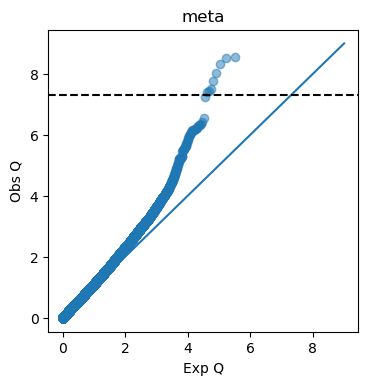

In [151]:
QQplot2(list(meta["P-value"].values), threshold=5e-8, title="meta")

In [121]:
spark_sub = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/ipysch.common.snpid.tsv", delimiter="\t")
spark_sub = spark_sub[["CHR", "POS", "snpid"]]
spark_sub.head(3)
meta = pd.merge(spark_sub, meta, on="snpid")
meta.head(4)

,CHR,POS,snpid,Allele1,Allele2,Weight,Zscore,P-value,Direction
0,8,102132364,rs6980591,a,c,50643.0,2.482,0.01307,+-
1,8,103657314,rs35465599,t,c,46923.0,0.371,0.71080,+-
2,8,101150009,rs77519446,a,g,47002.0,-1.369,0.17110,--
3,8,99151856,rs77635126,t,g,46727.0,1.672,0.09459,+-


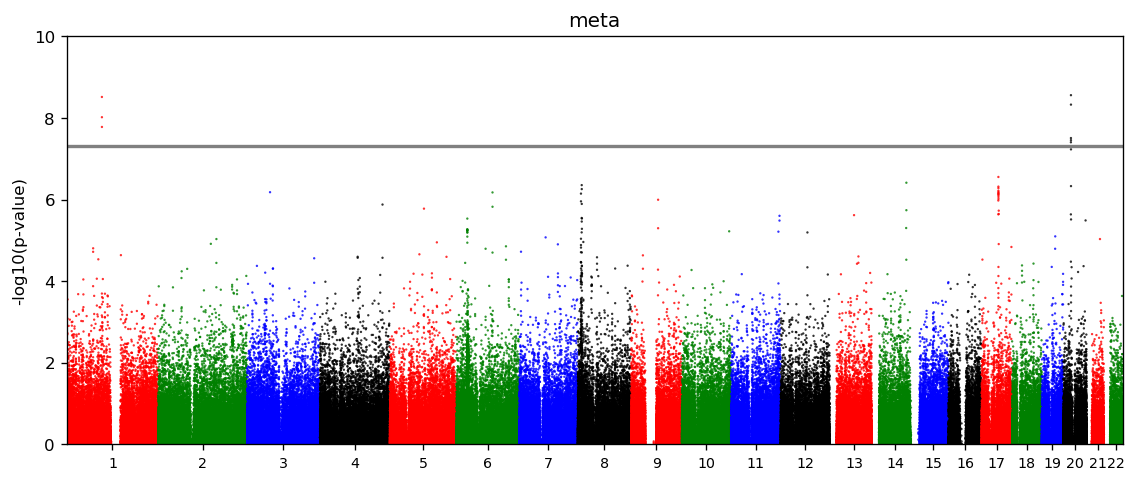

In [132]:
manhattan(meta, title="meta")

In [124]:
meta.to_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/meta.txt", sep="\t", index=False)

In [154]:
multi_issue = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/SPARK_Multi_tissue_gene_expr.cell_type_results.txt",
                         delimiter="\t")
multi_issue.head(3)

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
0,A08.186.211.730.885.287.500.Cerebral.Cortex,1.814951e-08,6.727387e-09,0.003489
1,A08.186.211.730.885.287.500.571.735.Visual.Cortex,1.773580e-08,6.593152e-09,0.003572
2,A08.186.211.730.885.287.500.270.Frontal.Lobe,1.499376e-08,6.285075e-09,0.008525


In [163]:
import re
def myfind(Name):
    match = re.findall(r'([A-Za-z][A-Za-z._]+[A-Za-z])', Name)
    #print(Name, match)
    return match[0]
Name = multi_issue["Name"].values
tissues = []
for name in Name:
    tissues.append(myfind(name))


In [169]:
multi_issue["tissue"] = multi_issue.apply(lambda row:myfind(row["Name"]), axis=1)
multi_issue.head(3)

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value,tissue
0,A08.186.211.730.885.287.500.Cerebral.Cortex,1.814951e-08,6.727387e-09,0.003489,Cerebral.Cortex
1,A08.186.211.730.885.287.500.571.735.Visual.Cortex,1.773580e-08,6.593152e-09,0.003572,Visual.Cortex
2,A08.186.211.730.885.287.500.270.Frontal.Lobe,1.499376e-08,6.285075e-09,0.008525,Frontal.Lobe


In [164]:
print(tissues)

['Cerebral.Cortex', 'Visual.Cortex', 'Frontal.Lobe', 'Hippocampus', 'Limbic.System', 'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Metencephalon', 'Entorhinal.Cortex', 'Parietal.Lobe', 'Endocrine.Cells', 'Cerebellum', 'Positive.T.Lymphocytes', 'Brain_Hypothalamus', 'Hypothalamus', 'Basal.Ganglia', 'Lymphocytes', 'Parotid.Gland', 'Hypothalamo.Hypophyseal.System', 'Brain', 'Salivary.Glands', 'Brain.Stem', 'Eye', 'Minor_Salivary_Gland', 'Skin_Not_Sun_Exposed', 'Leukocytes..Mononuclear', 'Brain_Anterior_cingulate_cortex', 'Megakaryocyte.Erythroid.Progenitor.Cells', 'Palatine.Tonsil', 'Brain_Cortex', 'Pituitary', 'Colon_Transverse', 'Monocyte.Macrophage.Precursor.Cells', 'Lymphocytes..Null', 'Brain_Frontal_Cortex', 'T.Lymphocytes..Regulatory', 'Brain_Nucleus_accumbens', 'Granulocyte.Macrophage.Progenitor.Cells', 'Prostate', 'Synovial.Fluid', 'Muscle_Skeletal', 'Heart_Left_Ventricle', 'T.Lymphocytes', 'Brain_Substantia_nigra', 'Brain_Spinal_cord', 'Brain_Amygdala', 'Tongue', 'Periodont

In [312]:
Dat = []

In [313]:
CNS = ['Cerebral.Cortex', 'Visual.Cortex', 'Frontal.Lobe', 'Hippocampus', 'Limbic.System', 
       'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Metencephalon', 'Entorhinal.Cortex',
       'Parietal.Lobe', 'Endocrine.Cells', 'Cerebellum', 'Brain_Hypothalamus', 'Hypothalamus', 
       'Basal.Ganglia', 'Brain', 'Brain.Stem', 'Brain_Anterior_cingulate_cortex']
Others = []
for tissue in tissues:
    if "Brain" in tissue or "Neural" in tissue:
        CNS.append(tissue)
CNS = set(CNS)
print (CNS)
Dat.append((CNS, "CNS"))

{'Frontal.Lobe', 'Metencephalon', 'Limbic.System', 'Hippocampus', 'Brain_Frontal_Cortex', 'Cerebellum', 'Visual.Cortex', 'Brain_Cortex', 'Brain_Hippocampus', 'Cerebral.Cortex', 'Brain_Nucleus_accumbens', 'Brain_Anterior_cingulate_cortex', 'Brain_Putamen', 'Brain.Stem', 'Neural.Stem.Cells', 'Hypothalamus', 'Brain', 'Brain_Caudate', 'Basal.Ganglia', 'Entorhinal.Cortex', 'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Brain_Amygdala', 'Endocrine.Cells', 'Parietal.Lobe', 'Brain_Hypothalamus', 'Brain_Substantia_nigra', 'Brain_Spinal_cord'}


In [314]:
Cardiovascular = []
for tissue in tissues:
    if "Heart" in tissue:
        Cardiovascular.append(tissue)
Cardiovascular = set(Cardiovascular)
print(Cardiovascular)
Dat.append((Cardiovascular, "Cardiovascular"))

{'Heart.Atria', 'Heart_Atrial_Appendage', 'Heart', 'Heart_Left_Ventricle', 'Heart.Ventricles'}


In [315]:
Blood_Immu = []
for tissue in tissues:
    if "Blood" in tissue or "Lymph" in tissue or "Immune" in tissue or "Plasma" in tissue\
    or "Leukocytes" in tissue or "Veins" in tissue:
        Blood_Immu.append(tissue)
Blood_Immu = set(Blood_Immu)
print(Blood_Immu)
Dat.append((Blood_Immu, "Blood_Immu"))

{'Blood.Platelets', 'T.Lymphocytes', 'Fetal.Blood', 'T.Lymphocytes..Regulatory', 'Lymphocytes', 'Lymph.Nodes', 'Blood', 'B.Lymphocytes', 'Blood.Vessels', 'Leukocytes..Mononuclear', 'Whole_Blood', 'Leukocytes', 'Plasma.Cells', 'Umbilical.Veins', 'Immune.System', 'Lymphoid.Tissue', 'Precursor.Cells..B.Lymphoid', 'Blood.Cells', 'Lymphocytes..Null', 'Positive.T.Lymphocytes', 'Veins'}


In [316]:
Digestive = []
for tissue in tissues:
    if "Esophagus" in tissue or "Stomach" in tissue or "Colon" in tissue:
        Digestive.append(tissue)
Digestive = set(Digestive)
print(Digestive)
Dat.append((Digestive, "Digestive"))

{'Colon_Sigmoid', 'Stomach', 'Esophagus', 'Esophagus_Gastroesophageal_Junction', 'Colon_Transverse', 'Colon..Sigmoid', 'Esophagus_Mucosa', 'Colon', 'Esophagus_Muscularis'}


In [317]:
Musculoskeletal = []
for tissue in tissues:
    if "Muscle" in tissue or "Bone" in tissue or "Muscles" in tissue:
        Musculoskeletal.append(tissue)
Musculoskeletal = set(Musculoskeletal)
print(Musculoskeletal)
Dat.append((Musculoskeletal, "Musculoskeletal"))

{'Quadriceps.Muscle', 'Muscle..Smooth', 'Muscle_Skeletal', 'Myocytes..Smooth.Muscle', 'Muscles', 'Bone.Marrow.Cells'}


In [318]:
viscera = []
for tissue in tissues:
    if "Pancreas" in tissue or "Kidney" in tissue or "Liver" in tissue or "Cecum" in tissue or "Lung" in tissue \
    :
        viscera.append(tissue)
viscera = set(viscera)
print(viscera)
Dat.append((viscera, "viscera"))

{'Kidney', 'Cecum', 'Pancreas', 'Liver', 'Kidney.Cortex', 'Kidney_Cortex', 'Lung'}


In [319]:
Others = []
for tissue in tissues:
    if tissue not in CNS.union(Cardiovascular).union(Blood_Immu).union(Digestive).union(viscera).union(Musculoskeletal):
        Others.append(tissue)
Others = set(Others)
print(Others)
Dat.append((Others, "Others"))

{'Epithelial.Cells', 'Rectum', 'Chondrocytes', 'Dentition', 'Intestines', 'Endocrine.Glands', 'Cervix_Endocervix', 'Testis', 'Erythroid.Cells', 'Hypothalamo.Hypophyseal.System', 'Arteries', 'Monocytes', 'Nasopharynx', 'Hematopoietic.Stem.Cells', 'Genitalia..Female', 'Urinary.Bladder', 'Mesencephalon', 'Hepatocytes', 'Chorion', 'Keratinocytes', 'Adrenal.Glands', 'Synovial.Fluid', 'Dendritic.Cells', 'Stem.Cells', 'Killer.Cells..Natural', 'Palatine.Tonsil', 'Osteoblasts', 'Keloid', 'Granulocyte.Macrophage.Progenitor.Cells', 'Embryoid.Bodies', 'Phagocytes', 'Stromal.Cells', 'Membranes', 'Mouth', 'Vagina', 'Foreskin', 'Diencephalon', 'Eye', 'Tongue', 'Ovary', 'Genitalia', 'Macrophages..Alveolar', 'Cells_Transformed_fibroblasts', 'Granulocyte.Precursor.Cells', 'Artery_Coronary', 'Salivary.Glands', 'Myeloid.Progenitor.Cells', 'Glucagon.Secreting.Cells', 'Fallopian_Tube', 'Thyroid.Gland', 'Epidermis', 'Adrenal_Gland', 'Myometrium', 'Oocytes', 'Cervix.Uteri', 'Intestinal.Mucosa', 'Artery_Aorta'

In [320]:
i=0
Dat_dat = []
for a,b in Dat:
    c = []
    for row in multi_issue.iterrows():
        if row[1]["tissue"] in a:
            c.append((i, row[1]["Coefficient_P_value"]))
            i += 1
    Dat_dat.append((b, c))

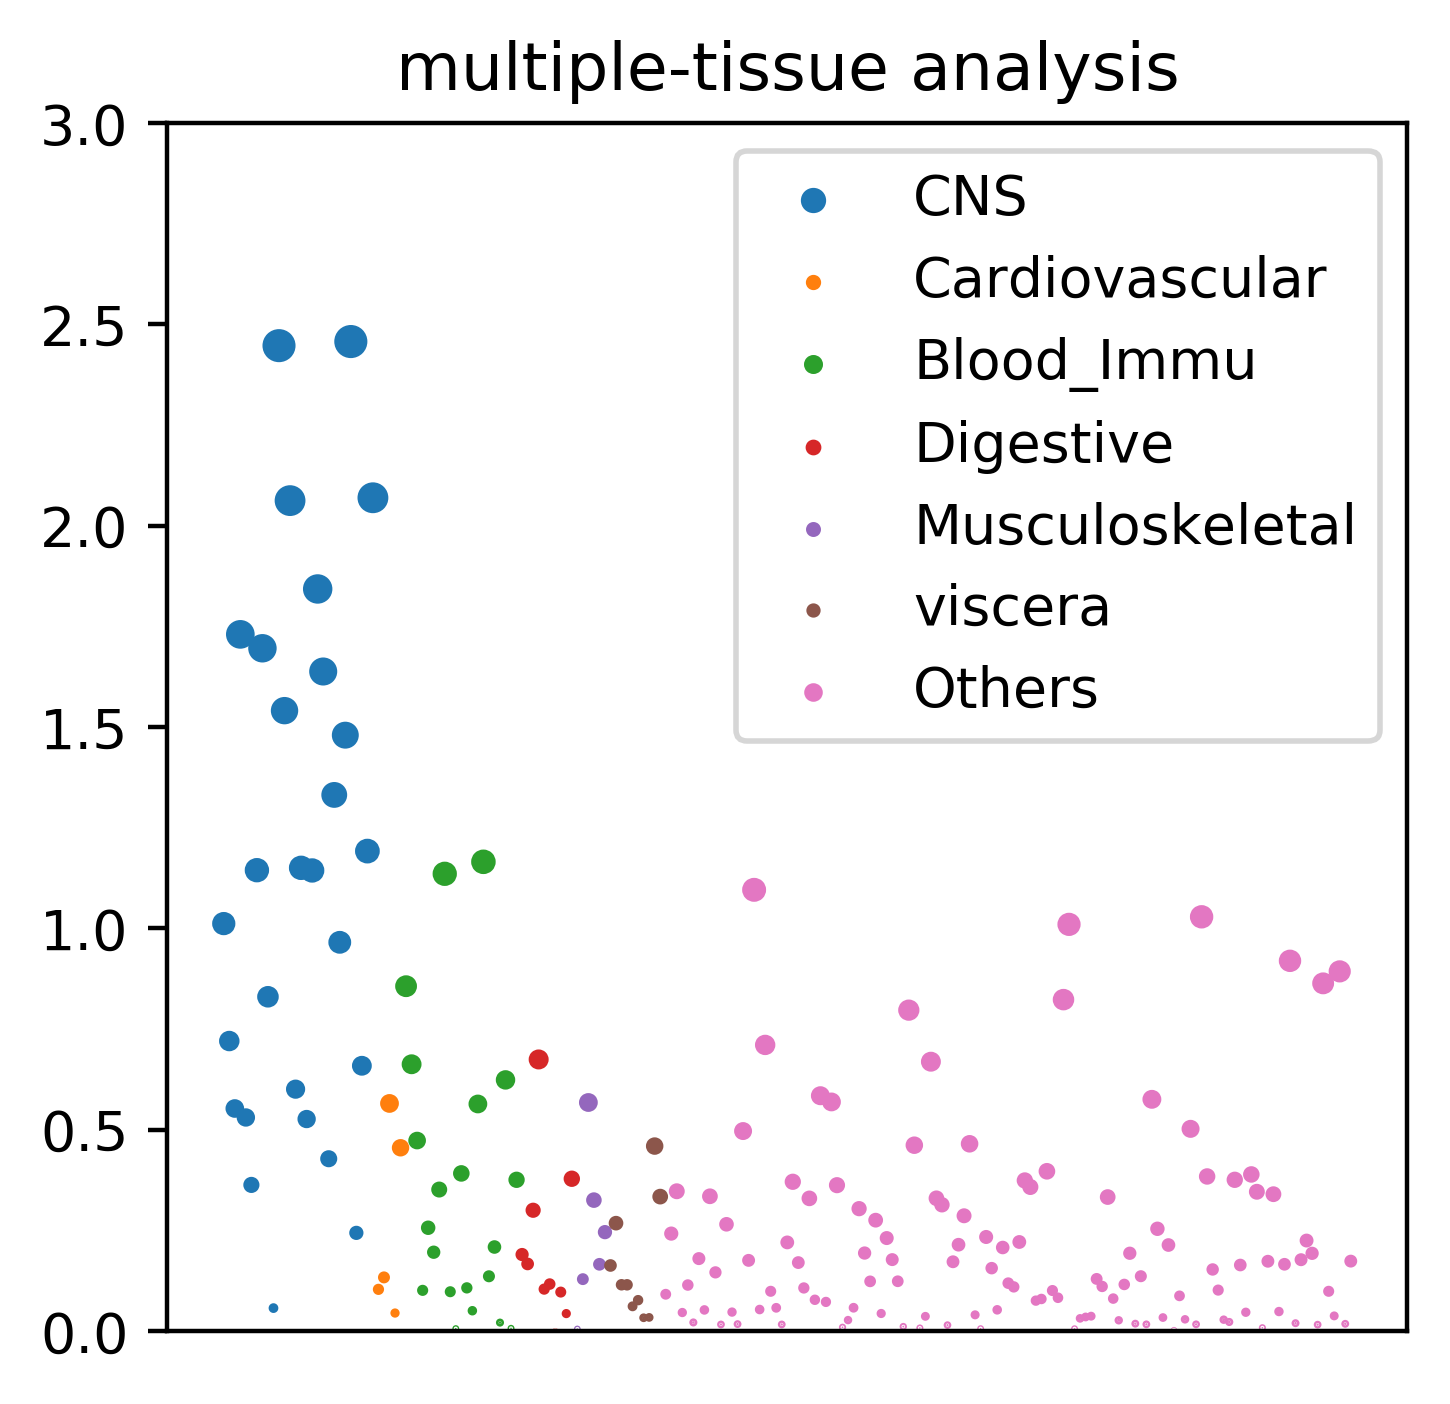

In [361]:
plt.figure(figsize=(4,4), dpi=400)
for name, dat in Dat_dat:
    #random.shuffle(dat)
    X = [x for (x,y) in dat]
    Y = [-math.log(y, 10) for (x,y) in dat]
    random.shuffle(Y)
    size = [x*10 for x in Y]
    plt.scatter(X,Y,s=size, label=name)
plt.legend()
plt.title("multiple-tissue analysis")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim((0,3))
plt.show()

In [324]:
gene_cor = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/meta.txt.2238082a-0758-454c-a81b-59254845b298.rg.results.csv")
gene_cor.head(5)

,trait1,trait2,PMID,Category,ethnicity,note,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,meta,Childhood IQ,23358156,education,European,SNPs from the MHC (chr6 26M~34M) region was re...,0.1839,0.1130,1.6273,0.103700,0.2868,0.0709,1.0127,0.0154,-0.0004,0.0119
1,meta,Depressive symptoms,27089181,psychiatric,European,SNPs from the MHC (chr6 26M~34M) region was re...,0.2672,0.0747,3.5784,0.000300,0.0474,0.0055,1.0074,0.0127,0.0031,0.0097
2,meta,Years of schooling 2016,27225129,education,European,SNPs from the MHC (chr6 26M~34M) region was re...,0.1634,0.0378,4.3188,0.000016,0.1350,0.0060,0.9208,0.0160,0.0116,0.0107
3,meta,Anorexia Nervosa,24514567,psychiatric,European,SNPs from the MHC (chr6 26M~34M) region was re...,0.0303,0.0610,0.4962,0.619800,0.6460,0.0504,0.8955,0.0129,0.0090,0.0093
4,meta,Alzheimers disease,24162737,neurological,European,SNPs from the MHC (chr6 26M~34M) region was re...,-0.1157,0.2122,-0.5454,0.585500,0.0180,0.0536,1.1201,0.0744,0.0027,0.0089


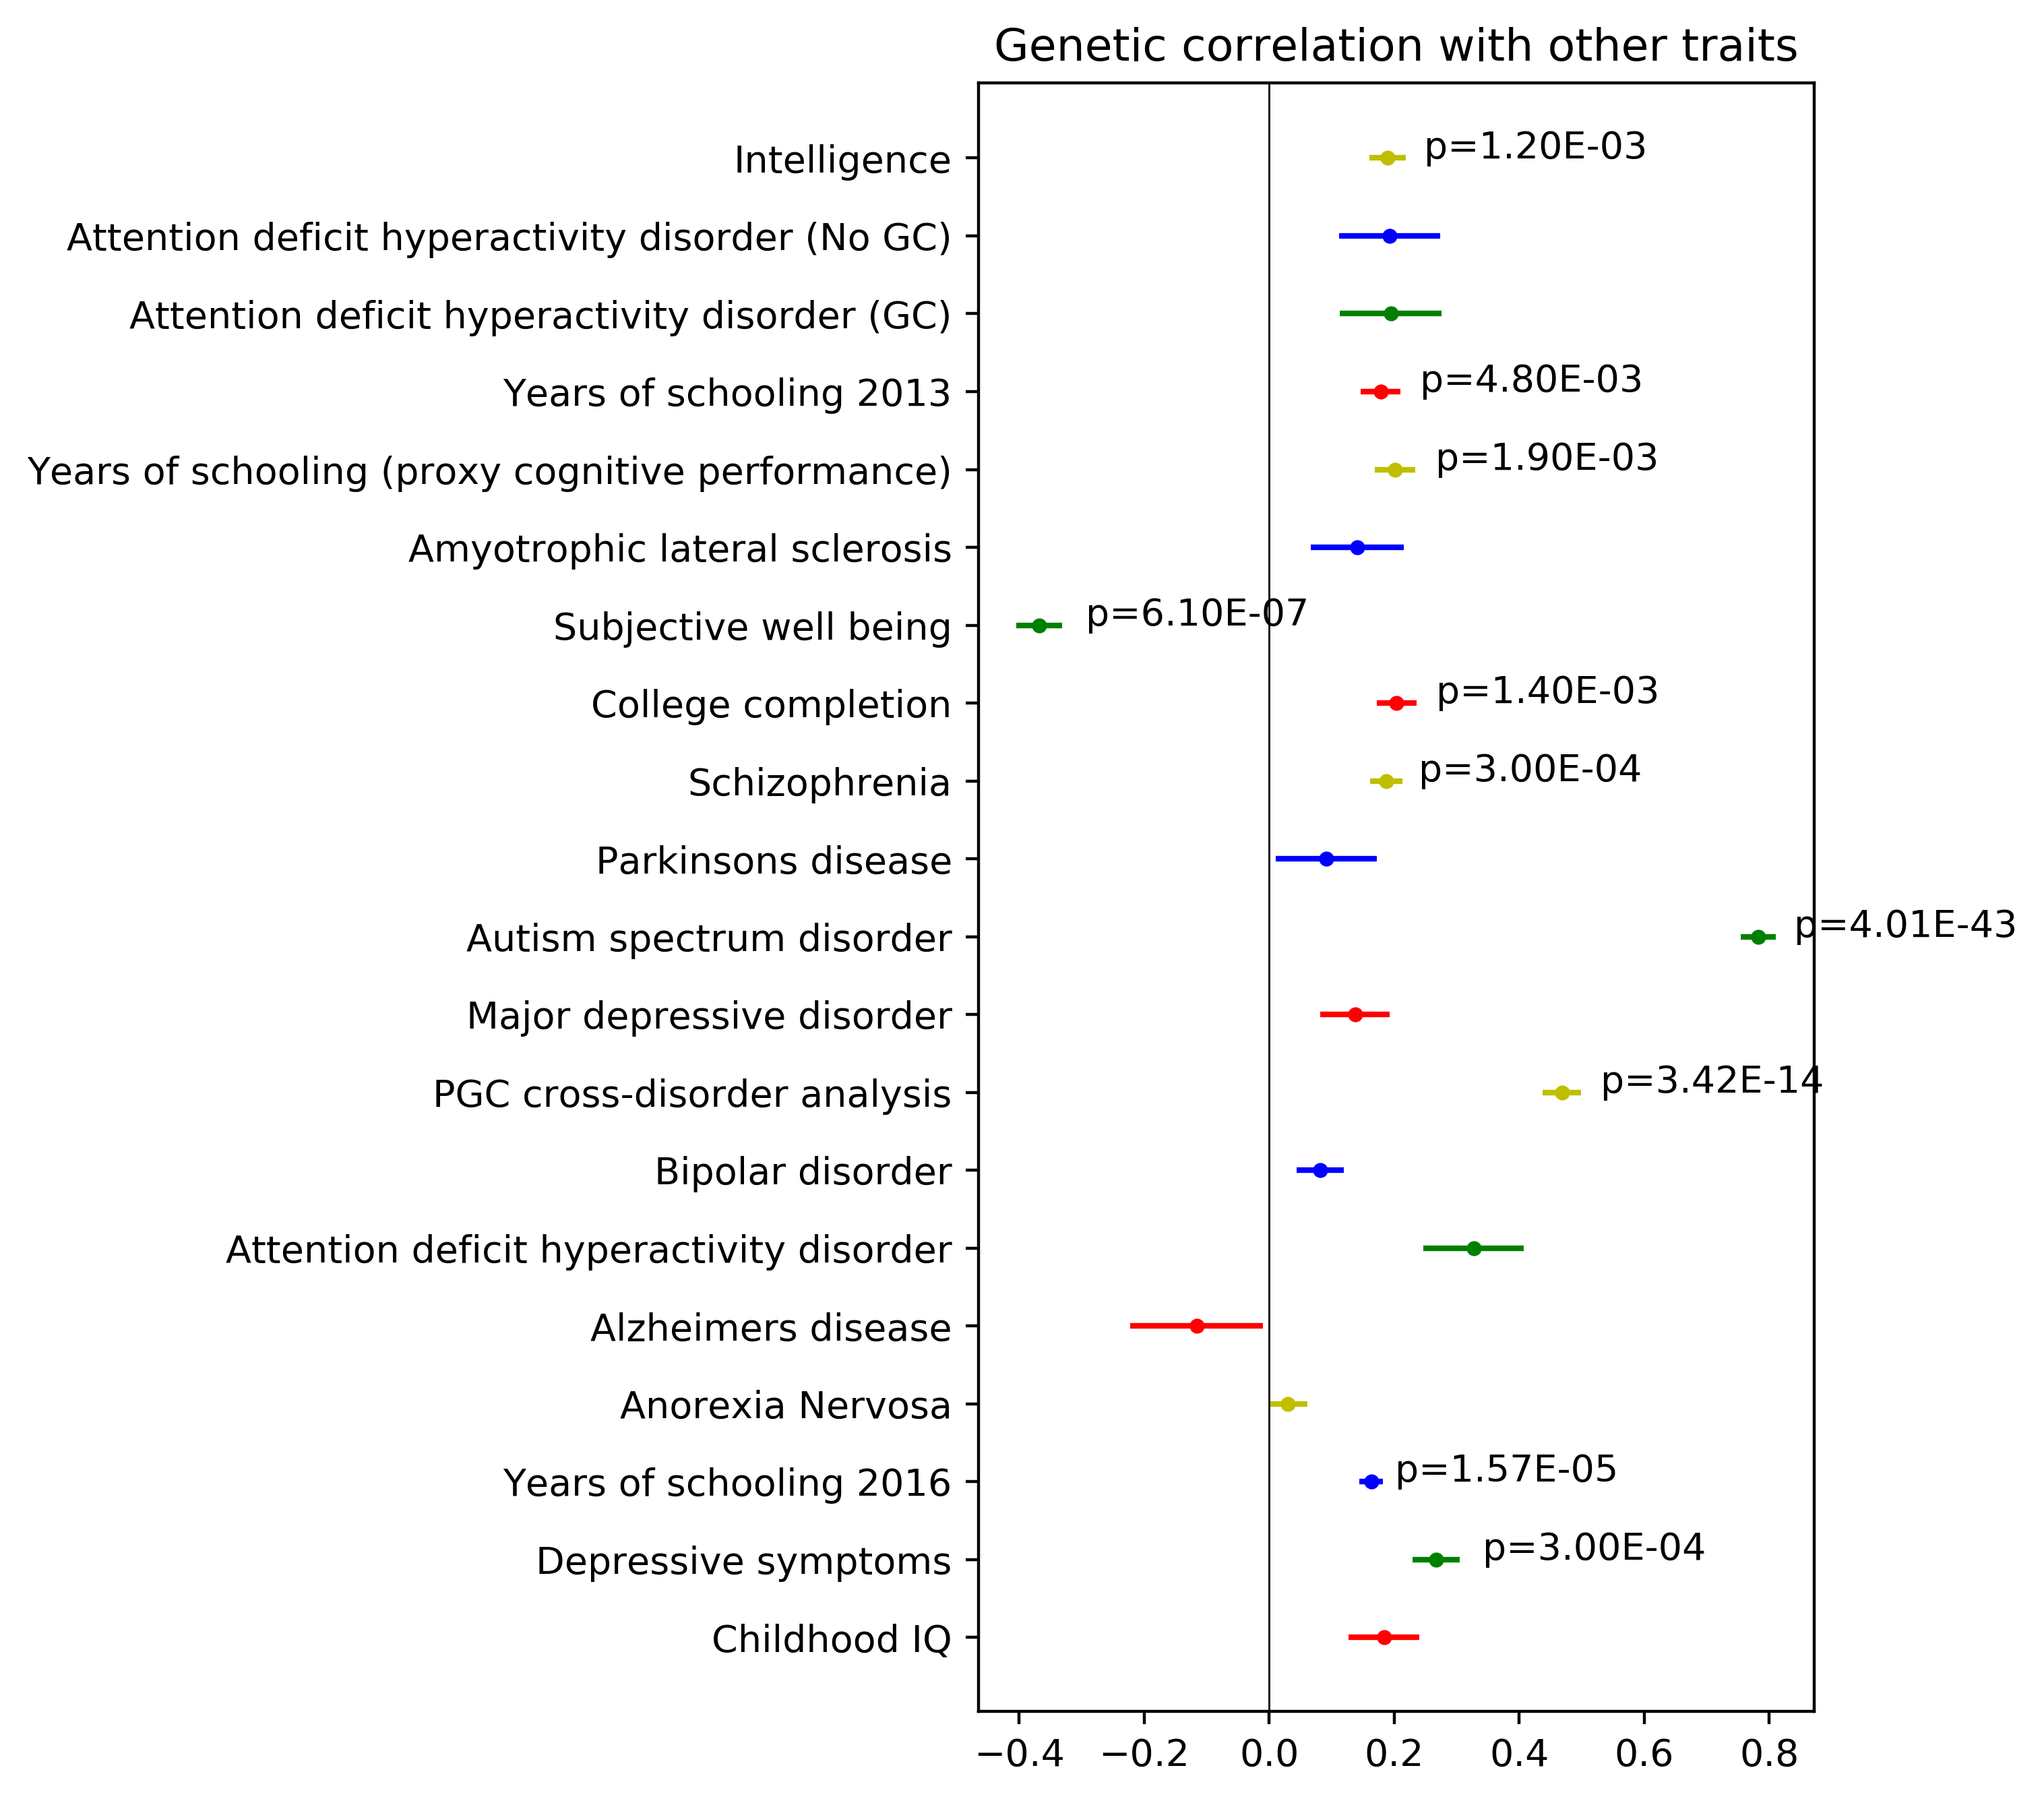

In [365]:
from decimal import Decimal
#plt.figure(figsize=(4,4), dpi=200,frameon=False)
fig, ax = plt.subplots(figsize=(4,8), dpi=400)


y = 0
colors = "rgby"
colors = cycle(colors)
ax.axvline(x=0, c="black", linewidth=0.5)
labels = []
for row in gene_cor.iterrows():
    y += 1
    labels.append(row[1]["trait2"])
    rg = row[1]["rg"]
    se = row[1]["se"]
    color = next(colors)
    ax.hlines(y, rg-0.5*se, rg+0.5*se, color = color)
    ax.scatter(rg, y, marker=".", color=color)
    pvalue = row[1]["p"]
    if pvalue < 1e-2:
        ax.text(rg+se, y, 'p=%.2E' % Decimal(pvalue))
    
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'
ax.set_yticks(np.arange(1, y+1, 1.0))
ax.set_yticklabels(labels)
plt.title("Genetic correlation with other traits")
plt.show()
#plt.hlines(1, 0.4, 0.5)
#plt.hlines(2, 0.8, 0.9)
#plt.hlines(3, 0.1, 0.2)

In [3]:
6281 -  4719

1562